In [3]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# 计算NDVI
def calculate_ndvi(image_path, nir_band_number,red_band_number):
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        # 处理异常值
        band_red[band_red>100] = np.median(band_red)
        band_nir[band_nir>100] = np.median(band_nir)
        # 计算NDVI
        ndvi = (band_nir - band_red) / (band_nir + band_red)
        
        # 处理除以零的情况
        ndvi[np.isnan(ndvi)] = 0

        return ndvi
# 计算SAVI
def calculate_savi(image_path, nir_band_number, red_band_number):
    L = 0.5
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 处理异常值
        band_red[band_red > 100] = np.median(band_red)
        band_nir[band_nir > 100] = np.median(band_nir)
        
        # 计算SAVI
        savi = (band_nir - band_red) / (band_nir + band_red + L) * (1.0 + L)
        
        # 处理除以零的情况
        savi[np.isnan(savi)] = 0
        return savi

# 计算NDWI
def calculate_ndwi(image_path,nir_band_number, green_band_number):
    with rasterio.open(image_path) as src:
        band_green = src.read(green_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 处理异常值
        band_green[band_green > 100] = np.median(band_green)
        band_nir[band_nir > 100] = np.median(band_nir)
        # 计算NDWI
        ndwi = (band_green - band_nir) / (band_green + band_nir)
        
        # 处理除以零的情况
        ndwi[np.isnan(ndwi)] = 0
        return ndwi
# 计算EVI
def calculate_evi(image_path, nir_band_number, red_band_number, blue_band_number):
    G = 2.5
    C1 = 6.0
    C2 = 7.5
    L = 1.0
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        band_blue = src.read(blue_band_number).astype(np.float32)
        
        # 适当修改异常值处理逻辑，确保它适用于您的数据范围
        # 例如，如果您知道数据是归一化的反射率，可能需要调整这里的阈值
        band_red[band_red > 100] = np.median(band_red)
        band_nir[band_nir > 100] = np.median(band_nir)
        band_blue[band_blue > 100] = np.median(band_blue)
        
        # 计算EVI
        evi = G * (band_nir - band_red) / (band_nir + C1 * band_red - C2 * band_blue + L)
        
        # 处理除以零的情况
        evi[np.isnan(evi)] = 0
        
        return evi

# 计算LSWI
def calculate_lswi(image_path, nir_band_number, swir_band_number):
    with rasterio.open(image_path) as src:
        band_swir = src.read(swir_band_number).astype(np.float32)
        band_nir = src.read(nir_band_number).astype(np.float32)
        
        # 处理异常值
        band_swir[band_swir > 100] = np.median(band_swir)
        band_nir[band_nir > 100] = np.median(band_nir)
        
        # 计算LSWI
        lswi = (band_nir - band_swir) / (band_nir + band_swir)
        
        # 处理除以零的情况
        lswi[np.isnan(lswi)] = 0
        
        return lswi

# 计算MNDWI
def calculate_mndwi(image_path, green_band_number, swir_band_number):
    with rasterio.open(image_path) as src:
        band_green = src.read(green_band_number).astype(np.float32)
        band_swir = src.read(swir_band_number).astype(np.float32)
        
        # 处理异常值
        band_green[band_green > 100] = np.median(band_green)
        band_swir[band_swir > 100] = np.median(band_swir)
        
        # 计算MNDWI
        mndwi = (band_green - band_swir) / (band_green + band_swir)
        
        # 处理除以零的情况
        mndwi[np.isnan(mndwi)] = 0
        
        return mndwi

# 计算NDMI
def calculate_ndmi(image_path, nir_band_number, swir_band_number):
    with rasterio.open(image_path) as src:
        band_nir = src.read(nir_band_number).astype(np.float32)
        band_swir = src.read(swir_band_number).astype(np.float32)
        
        # 处理异常值
        band_nir[band_nir > 100] = np.median(band_nir)
        band_swir[band_swir > 100] = np.median(band_swir)
        
        # 计算NDMI
        ndmi = (band_nir - band_swir) / (band_nir + band_swir)
        
        # 处理除以零的情况
        ndmi[np.isnan(ndmi)] = 0
        
        return ndmi
# 计算VARI
def calculate_vari(image_path,red_band_number,green_band_number,blue_band_number):
    with rasterio.open(image_path) as src:
        band_red = src.read(red_band_number).astype(np.float32)
        band_green = src.read(green_band_number).astype(np.float32)
        band_blue = src.read(blue_band_number).astype(np.float32)

        # 处理异常值
        band_red[band_red > 100] = np.median(band_red)
        band_green[band_green > 100] = np.median(band_green)
        band_blue[band_blue > 100] = np.median(band_blue)

        # 计算VARI
        vari = (band_green - band_red) / (band_green + band_red - band_blue)
        # 处理除以零的情况
        vari[np.isnan(vari)] = 0

        return vari

In [6]:
# 源TIF路径
image_path = r"F:\cache_data\tif_file_sentinel\DY_20230701_20231031\dy_bands14.tif"
# 使用下载的Sentinel-2图像
ndvi = calculate_ndvi(image_path,8,4)
savi = calculate_savi(image_path,8,4)
ndwi = calculate_ndwi(image_path,8,3)
evi = calculate_evi(image_path,8,4,2)
lswi = calculate_lswi(image_path,8,11)
mndwi = calculate_mndwi(image_path,3,11)
ndmi = calculate_ndmi(image_path,8,11)
vari = calculate_vari(image_path,4,3,2)


C:\Users\Runker\AppData\Local\Temp\ipykernel_24964\411691837.py:141: RuntimeWarning: divide by zero encountered in divide
  vari = (band_green - band_red) / (band_green + band_red - band_blue)
C:\Users\Runker\AppData\Local\Temp\ipykernel_24964\411691837.py:141: RuntimeWarning: invalid value encountered in divide
  vari = (band_green - band_red) / (band_green + band_red - band_blue)


In [4]:
# NDVI存储路径
ndvi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\NDVI.tif"
# SAVI存储路径
savi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\SAVI.tif"
# NDWI存储路径
ndwi_out_path = r"F:\cache_data\tif_file_texture\gl\one_bands\NDWI.tif"
# 保存为TIF文件
for one_file in [ndvi_out_path, savi_out_path, ndwi_out_path]:
    with rasterio.open(image_path) as src:
        with rasterio.open(
            one_file,
            'w',
            driver='GTiff',
            height=ndvi.shape[0],
            width=ndvi.shape[1],
            count=1,
            dtype=ndvi.dtype,
            crs=src.crs,
            transform=src.transform
        ) as dst:
            dst.write(ndvi, 1)

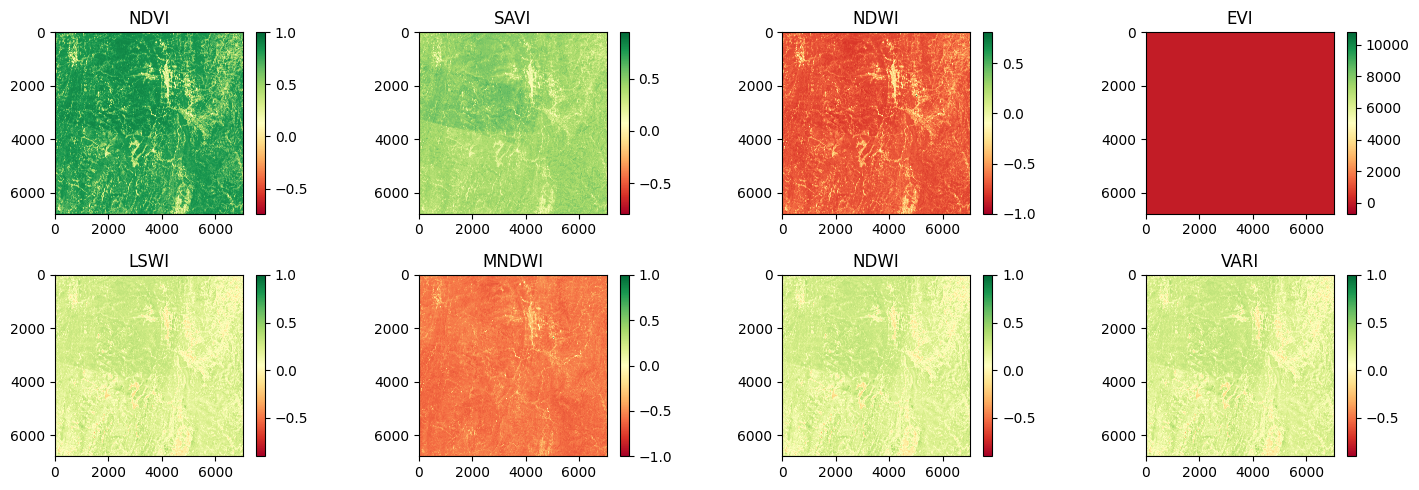

In [7]:
# 创建一个画布和三个子图
fig, axs = plt.subplots(2, 4, figsize=(15, 5))  # 1行3列的子图布局

# 分别在三个子图中显示NDVI图像
img1 = axs[0,0].imshow(ndvi, cmap='RdYlGn')
img2 = axs[0,1].imshow(savi, cmap='RdYlGn')
img3 = axs[0,2].imshow(ndwi, cmap='RdYlGn')
img4 = axs[0,3].imshow(evi, cmap='RdYlGn')

img5 = axs[1,0].imshow(lswi, cmap='RdYlGn')
img6 = axs[1,1].imshow(mndwi, cmap='RdYlGn')
img7 = axs[1,2].imshow(ndmi, cmap='RdYlGn')
img8 = axs[1,3].imshow(ndmi, cmap='RdYlGn')


# 为每张图添加颜色条
fig.colorbar(img1, ax=axs[0,0], fraction=0.046, pad=0.04)
fig.colorbar(img2, ax=axs[0,1], fraction=0.046, pad=0.04)
fig.colorbar(img3, ax=axs[0,2], fraction=0.046, pad=0.04)
fig.colorbar(img4, ax=axs[0,3], fraction=0.046, pad=0.04)

fig.colorbar(img5, ax=axs[1,0], fraction=0.046, pad=0.04)
fig.colorbar(img6, ax=axs[1,1], fraction=0.046, pad=0.04)
fig.colorbar(img7, ax=axs[1,2], fraction=0.046, pad=0.04)
fig.colorbar(img8, ax=axs[1,3], fraction=0.046, pad=0.04)


# 为每个子图设置标题
axs[0,0].set_title('NDVI')
axs[0,1].set_title('SAVI')
axs[0,2].set_title('NDWI')
axs[0,3].set_title('EVI')


axs[1,0].set_title('LSWI')
axs[1,1].set_title('MNDWI')
axs[1,2].set_title('NDWI')
axs[1,3].set_title('VARI')

# 调整子图之间的间隔
plt.subplots_adjust(hspace=0.4)  # 增大行间距

# 显示图像
plt.tight_layout()
plt.show()

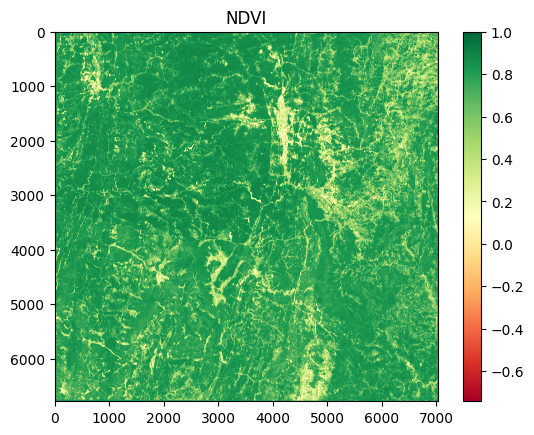

In [8]:
# 可视化NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.show()

In [9]:
# 存储文件
def save_raster(output_path, data, profile, suffix):
    # 创建输出路径
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # 更新 profile
    profile.update(dtype=rasterio.float32, count=1)
    
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(data, 1)

def main(image_path, output_folder):
    with rasterio.open(image_path) as src:
        profile = src.profile
        transform = src.transform
        # 保存结果到指定文件夹
        save_raster(os.path.join(output_folder, 'ndvi.tif'), ndvi, profile, 'ndvi')
        save_raster(os.path.join(output_folder, 'savi.tif'), savi, profile, 'savi')
        save_raster(os.path.join(output_folder, 'ndwi.tif'), ndwi, profile, 'ndwi')
        save_raster(os.path.join(output_folder, 'evi.tif'), evi, profile, 'evi')
        save_raster(os.path.join(output_folder, 'lswi.tif'), lswi, profile, 'lswi')
        save_raster(os.path.join(output_folder, 'mndwi.tif'), mndwi, profile, 'mndwi')
        save_raster(os.path.join(output_folder, 'ndmi.tif'), ndmi, profile, 'ndmi')
        save_raster(os.path.join(output_folder, 'vari.tif'), vari, profile, 'vari')

# 调用main函数，传入输出文件夹路径
output_folder = r'F:\cache_data\tif_file_texture\dy_20230701_20231031'
main(image_path, output_folder)
